In [46]:
import pandas as pd
from glob import glob
from dataframe_formatting import read_climate_to_dataframe,read_RTE_to_dataframe
import warnings
warnings.filterwarnings("ignore")

In [47]:
from dataframe_formatting import dataframe_model,make_train_test_all


df = dataframe_model(
r"/home/dehk/sequentior/data/conso/eCO2mix_RTE_Ile-de-France_Annuel-Definitif",
"/home/dehk/sequentior/data/weather/0715609999",
)
# X, y, time_list = make_train_test_all(df)

In [48]:
df.sort_index(inplace=True)

In [49]:
from create_features import FeatureCreation
ft_creation = FeatureCreation(horizon_prediction=20)  # timedelta(hours=20))
df_ft = ft_creation.predict(df)

In [50]:
from models.sequential_agregation import BOA
model = BOA()

In [51]:
model.fit_predict(df_ft)

0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00:00.000000002
0 days 00:00

KeyboardInterrupt: 

In [52]:
from models.linear_models import SequentialGAMModel 
gam = SequentialGAMModel(horizon_prediction="24H",submodel_params=      {  "lams": 3570,
                "n_splines": 10,
                "loss_type": "square",
                "loss_gradient": "square","gridsearch":False},frequence_training = pd.DateOffset(days=365))
gam.fit_predict(df_ft)

1 days 00:00:00
1 days 00:00:00
1 days 00:00:00
1 days 00:00:00
1 days 00:00:00


In [53]:
from models.linear_models import SequentialLinearModel 
lr = SequentialLinearModel(horizon_prediction="24H",submodel_params=      {  "lams": 3570,
                "n_splines": 10,
                "loss_type": "square",
                "loss_gradient": "square","gridsearch":False},frequence_training = pd.DateOffset(days=365))
lr.fit_predict(df_ft)

1 days 00:00:00
1 days 00:00:00
1 days 00:00:00
1 days 00:00:00
1 days 00:00:00


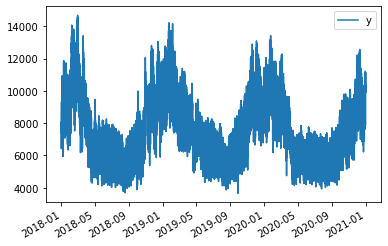

In [54]:
lr.df_prediction.plot()

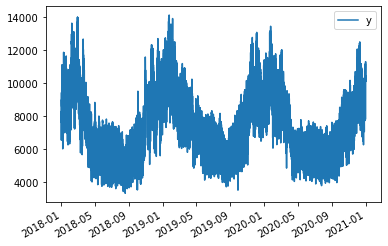

In [55]:
gam.df_prediction.plot()

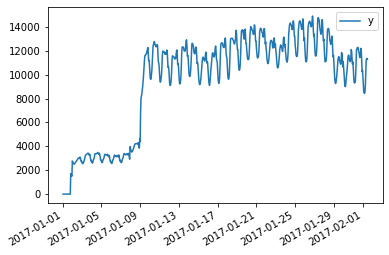

In [56]:
model.df_prediction.plot()

In [57]:
model.df_prediction

,y
2017-01-01 01:00:00,-0.934276
2017-01-01 02:00:00,-0.92074
2017-01-01 03:00:00,-0.951764
2017-01-01 04:00:00,-0.967252
2017-01-01 05:00:00,-1.002818
...,...
2017-02-01 07:00:00,10237.34668
2017-02-01 08:00:00,11229.581055
2017-02-01 09:00:00,11299.180664
2017-02-01 10:00:00,11357.113281


In [58]:
df_weight = pd.DataFrame(model.weights,columns = list(df_ft.drop("y",axis=1).columns))

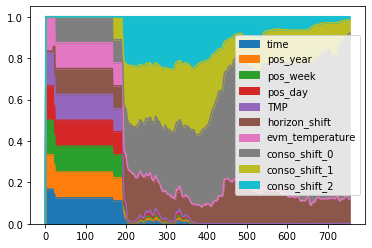

In [59]:
df_weight.plot(kind="area")

In [21]:
model.weights

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66666672e-01, 1.66666672e-01, 1.66666672e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66666672e-01, 1.66666672e-01, 1.66666672e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.67200480e-05, 4.67096215e-05, 4.65292906e-05, ...,
        8.20882559e-01, 1.71102270e-01, 5.26841699e-28],
       [4.64826298e-05, 4.64722616e-05, 4.62928911e-05, ...,
        8.21780205e-01, 1.70233727e-01, 5.23590922e-28],
       [4.63103934e-05, 4.63000579e-05, 4.61213567e-05, ...,
        8.22403669e-01, 1.69633508e-01, 5.21183365e-28]])

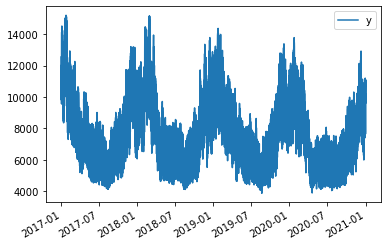

In [18]:
df_ft.plot(y="y")